In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
data = [50.1, 50.3, 50.3, 51.2, 51.5, 51.6]

In [3]:
np.mean(data)

50.833333333333336

<h3>Sample variance</h3>

In [4]:
def sample_variance(data_set): #s**2
    n = len(data_set)
    mean_data = sum(data_set)/n
    return 1/(n-1)*sum([(i-mean_data)**2 for i in data_set])

print(sample_variance(data))
print(np.var(data, ddof=1))

0.45466666666666833
0.4546666666666683


<h3>Population variance</h3>

In [5]:
n = len(data)
print(1/(n)*sum([(i-np.mean(data))**2 for i in data]))
print(np.var(data, ddof=0))

0.3788888888888902
0.3788888888888902


In [6]:
stats.norm.ppf(0.975)

1.959963984540054

In [7]:
stats.norm.ppf(0.95)

1.6448536269514722

<h3>Standard Normal Distribution</h3>

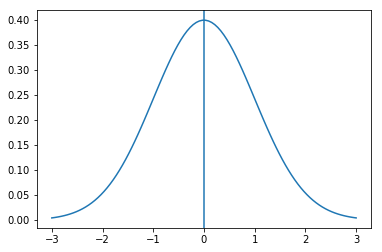

In [8]:
mu = 0
variance = 1
sigma = variance**0.5

#create an array from lower to upper, with 100 intervals
x = (np.linspace(mu - 3*sigma, mu + 3*sigma, 100)) 
y = [stats.norm.pdf(i) for i in x]
plt.axvline(0)
plt.plot(x,y)
plt.show()

<h3>Distribution of Sample Variance</h3>
$$\frac{n-1}{{\sigma}^2}S^2 \sim \chi_{n-1}^2$$

[347.22819235130066, 352.77180764869934]


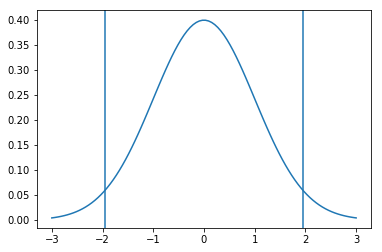

In [10]:
z_alpha = stats.norm.ppf(0.975)
n = 50
sigma = 10
sample_mean = 350
interval = [sample_mean - z_alpha*sigma/(50**0.5), sample_mean + z_alpha*sigma/(50**0.5)]
print(interval)

x = (np.linspace( -3, +3, 100)) 
y = [stats.norm.pdf(i) for i in x]
plt.axvline(z_alpha)
plt.axvline(-z_alpha)
plt.plot(x,y)
plt.show()

<h3>Exercise:</h3>

A bottling company uses a filling machine, and the amount filled is normally distributed.
Based on 16 samples, the sample standard deviation of the amount filled is 700 ml. Find a
95% two-sided confidence interval for $\sigma$.


[517.0934004253787, 1083.383855901225]


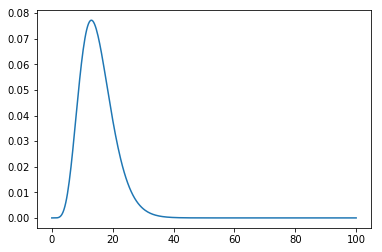

In [11]:
n = 16
S = 700
x = (np.linspace( 0, +100, 350)) 
y = [stats.chi2.pdf(i, n-1) for i in x]

l1 = stats.chi2.ppf(0.025,15)
l2 = stats.chi2.ppf(0.975,15)

interval = [((n-1)*S**2)/l2, ((n-1)*S**2)/l1]
print([i**0.5 for i in interval])
plt.plot(x,y)
plt.show()

$H_0:\mu = 19$

$H_A:\mu \neq 19$

$n = 36$

$\bar{x} = 20$

$s = 3$


In [ ]:
sample_size = 36
pop_mean = 19
sample_mean = 20
sample_stdev = 3

#using CLT
z = (sample_mean-pop_mean)/(sample_stdev/sample_size**0.5)
print(z)
p_value = 1-stats.norm.cdf(2)
print('p-value: ' + str(p_value))
print(str(round(p_value*100,3)) + ' percent')

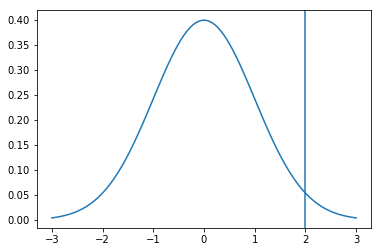

In [14]:
x = (np.linspace( -3, +3, 100)) 
y = [stats.norm.pdf(i) for i in x]
plt.axvline(z)
plt.plot(x,y)
plt.show()

Power of test

Let $f_1$ be the flow time of 1 unit at station 1

Assume $f_1 - setup_1 \propto \frac{1}{n_1}$, where $n_1, setup_1$ is the number of machines in station 1 and setup time for machine 1, respectively. 

$f_t = f_1 + setup_1 + f_2 + setup_2 + \frac{f_2 + setup_2 + f_3 + setup_3}{1-failure}$

$f_t =  \frac{k_1}{n_1} + setup_1 + \frac{k_2}{n_2} + setup_2 + \frac{\frac{k_2}{n_2} + setup_2 + \frac{k_3}{n_3} + setup_3}{1-failure}$



In [4]:
from scipy.stats import norm
from math import sqrt, floor
import seaborn as sns
import pandas as pd


daysleft = 100

c_s = profitfrom1order = 650.0
c_o = 1250-c_s

interest = 0.00026115787

mean_100 = 11.7389033943*daysleft
var_100 = (3.42606666977**2)*daysleft
zstar = norm.ppf(c_s/(c_s+c_o))

lhs =  mean_100+ (var_100)**0.5 * zstar
qstar = lhs
print(lhs, "optimal inventory position at start of 100 day period")
#1175.60863464


z = (qstar-mean_100)/sqrt(var_100)
elostsales = sqrt(var_100)*(norm.pdf(z) - z*(1-norm.cdf(z)))
esales = mean_100 - elostsales
eleftoverinv = qstar - esales
eprofit = esales*c_s - eleftoverinv*c_o
print(eprofit, "expected profit for exhaust-inventory strategy")

cost = round(lhs)*600
interestoncost = cost*(1+interest)**daysleft-cost
print(interestoncost, "interest in cost required")
#18651.6862155

#quick estimation of best-case profit if we did not change:
reorderpt = 61
#round down because we assume the last order doesn't hit before the end 
averagedaysbetweenreorder = floor(61.0/(mean_100/100)) 
bestremainingreorders = daysleft/averagedaysbetweenreorder
print (profitfrom1order * reorderpt * daysleft / 7.0 + interestoncost)

1175.6086346367806 optimal inventory position at start of 100 day period
745965.1591921359 expected profit for exhaust-inventory strategy
18667.559990961337 interest in cost required
585096.1314195328


$Q\ast = \sqrt{\frac{2AD}{h}} $

$h = i \times c \times Q\ast$